## Plant Seedling Image Classification

#### **Data Description:**
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its
unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's
species from a photo.

#### **Context:**
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

#### **Objective:**
To implement the techniques learnt as a part of the course.

#### **Learning Outcomes:**
* Pre-processing of image data.
* Visualization of images.
* Building CNN.
* Evaluate the Model.
* The motive of the project is to make the learners capable to handle images/image classification problems, during this
process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.


### Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

In [1]:
#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [194]:
# Import necessary libraries.
import math
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from google.colab.patches import cv2_imshow
from glob import glob
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [221]:
# Import data
X = np.load('/content/drive/My Drive/Colab Notebooks/Project 7/images.npy')
y = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project 7/Labels.csv')

In [222]:
y_array = np.asarray(y)

In [223]:
y

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [ ]:
y.shape

(4750, 1)

In [ ]:
X.shape

(4750, 128, 128, 3)

### Data Pre-processing: (15 Marks)
* Normalization.
* Gaussian Blurring.
* Visualize data after pre-processing.

In [169]:
# Normalize the data
X = X.astype('float32') / 255.0

In [170]:
# Gaussian Blurring on the images
from scipy.ndimage.filters import gaussian_filter as gaus
X = gaus(X, sigma=1)

Label: ['Small-flowered Cranesbill']


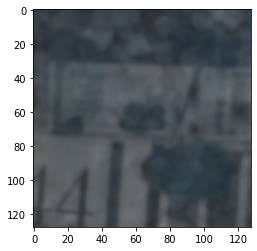

In [171]:
# Visualize the image at index 12
print("Label: {}".format(y_array[12]))
plt.imshow(X[12], cmap='gray')

### Make data compatible: (10 Marks)
* Convert labels to one-hot-vectors.
* Print the label for y_train[0].
*  Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)
* Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [240]:
#One-hot encoding of the labels
#just some basic preprocessing
y.drop_duplicates()
#creating dummy variables for the categorical features
y = pd.get_dummies(y)
y = y.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
y.head()

,Label_Black-grass,Label_Charlock,Label_Cleavers,Label_Common Chickweed,Label_Common wheat,Label_Fat Hen,Label_Loose Silky-bent,Label_Maize,Label_Scentless Mayweed,Label_Shepherds Purse,Label_Small-flowered Cranesbill,Label_Sugar beet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [241]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [242]:
y_train

,Label_Black-grass,Label_Charlock,Label_Cleavers,Label_Common Chickweed,Label_Common wheat,Label_Fat Hen,Label_Loose Silky-bent,Label_Maize,Label_Scentless Mayweed,Label_Shepherds Purse,Label_Small-flowered Cranesbill,Label_Sugar beet
3925,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2071,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4389,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
953,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1653,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2607,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
# Label of y_train[0]
y_train.columns[0]

'Label_Black-grass'

In [176]:
# Check shape of data
print(X_train.shape)
print(X_test.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)


**Insights:** Data is the correct shape. No need to reshape the data.

### Building CNN: (15 Marks)
* Define layers.
* Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [181]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_36 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_37 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 32, 32, 64)      

In [182]:
# Compile the model using categorical crossentropy and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit and evaluate model and print confusion matrix. (10 Marks)

In [183]:
#Adding early stopping to stop training the model
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)
#Adding checkpoint to the fit function is going to save the weights whenever val_loss achieves a new low value
model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)

# Fit the model
model.fit(X_train, y_train, batch_size=batch_size, epochs=40, validation_data=(X_test, y_test), shuffle=True, verbose=1, callbacks=[early_stopping,model_checkpoint])

Epoch 1/40
104/104 [==============================] - 11s 35ms/step - loss: 5.4920 - accuracy: 0.1270 - val_loss: 2.4715 - val_accuracy: 0.1102

Epoch 00001: val_loss improved from inf to 2.47150, saving model to cifar_cnn_checkpoint_01_loss2.4715.h5
Epoch 2/40
104/104 [==============================] - 3s 30ms/step - loss: 2.0773 - accuracy: 0.2578 - val_loss: 2.4201 - val_accuracy: 0.1046

Epoch 00002: val_loss improved from 2.47150 to 2.42005, saving model to cifar_cnn_checkpoint_02_loss2.4201.h5
Epoch 3/40
104/104 [==============================] - 3s 30ms/step - loss: 1.7488 - accuracy: 0.3602 - val_loss: 2.6461 - val_accuracy: 0.1123

Epoch 00003: val_loss did not improve from 2.42005
Epoch 4/40
104/104 [==============================] - 3s 30ms/step - loss: 1.4929 - accuracy: 0.4342 - val_loss: 2.1677 - val_accuracy: 0.2175

Epoch 00004: val_loss improved from 2.42005 to 2.16768, saving model to cifar_cnn_checkpoint_04_loss2.1677.h5
Epoch 5/40
104/104 [==========================

In [185]:
# Evaluate the model
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 0s 11ms/step - loss: 8.9738 - accuracy: 0.0554
Test loss: 8.97376823425293
Test accuracy: 0.05543859675526619


**Insights:** The accuracy score is very low so we cannot trust this neural network to predict images well.

In [239]:
# Confusion Matrix
Y_pred_cls = model.predict_classes(X_test, batch_size=40, verbose=0)
confusion_matrix(y_test.values, Y_pred_cls)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ValueError: ignored

**Insights:** Could not get teh confusion matrix to show to be able to evaluate.

### Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)


In [187]:
y_test_array = np.asarray(y_test)

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


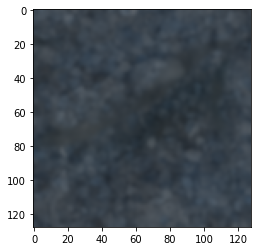

In [189]:
# Visualize the image X_test[2]
print("Label: {}".format(y_test_array[2]))
plt.imshow(X_test[2], cmap='gray')

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


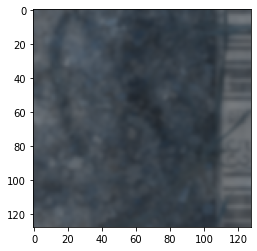

In [190]:
# Visualize the image X_test[3]
print("Label: {}".format(y_test_array[3]))
plt.imshow(X_test[3], cmap='gray')

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


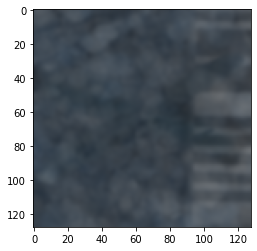

In [191]:
# Visualize the image X_test[33]
print("Label: {}".format(y_test_array[33]))
plt.imshow(X_test[33], cmap='gray')

Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


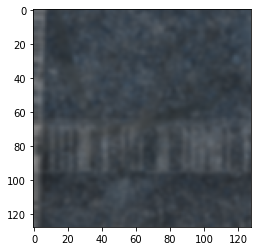

In [192]:
# Visualize the image X_test[36]
print("Label: {}".format(y_test_array[36]))
plt.imshow(X_test[36], cmap='gray')

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


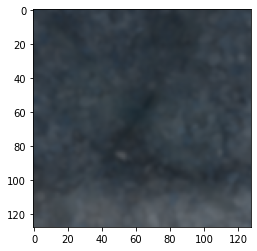

In [193]:
# Visualize the image X_test[59]
print("Label: {}".format(y_test_array[59]))
plt.imshow(X_test[59], cmap='gray')